# 자전거 수요 예측

### 1. 데이터 가져오기

In [92]:
import pandas as pd
import os

path_dir = "/aiffel/aiffel/bike_regression/data/bike-sharing-demand"
df = pd.read_csv(os.path.join(path_dir, "train.csv"))
df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [93]:
df_test = pd.read_csv(os.path.join(path_dir, "test.csv"))
df_test.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000


### 1-1 데이터 확인

In [97]:
df.info() # 타입

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [121]:
df.isnull().sum() # 결측치

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
year          0
month         0
day           0
hour          0
minute        0
second        0
dtype: int64

In [98]:
df.describe() # 기초 통계량

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


<AxesSubplot:>

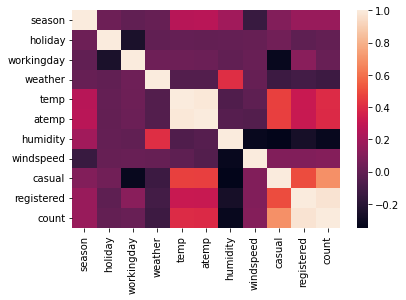

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df.corr() # 상관 계수
sns.heatmap(corr)

### 2. datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초 까지 6가지 컬럼 생성하기

In [41]:
def split_datetime(dt):
    splits = [dt.year, 
            dt.month, 
            dt.day,
            dt.hour,
            dt.minute,
            dt.second]
    splits = [int(x) for x in splits]
    return pd.Series(data=splits, index=["year", "month", "day", "hour", "minute", "second"])

def apply_split_datetime(df):
    datetime = pd.to_datetime(df["datetime"])
    return datetime.apply(split_datetime)

df_datetime = apply_split_datetime(df)
df_datetime.head(3)

,year,month,day,hour,minute,second
0,2011,1,1,0,0,0
1,2011,1,1,1,0,0
2,2011,1,1,2,0,0


### 3. year, month, day, hour, minute, second 데이터 갯수 시각화 하기

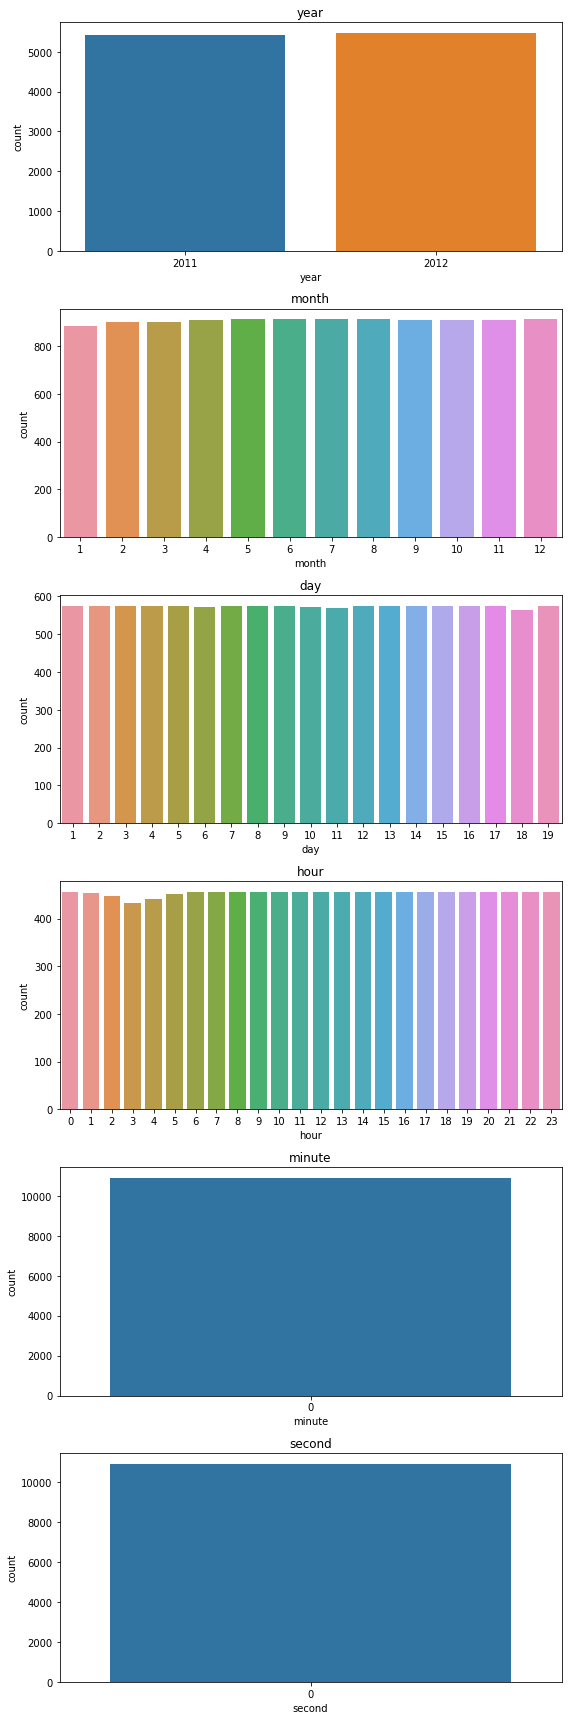

In [87]:
cols = df_datetime.columns

plt.figure(figsize=(8, 24))

for idx, col in enumerate(cols):
    ax = plt.subplot(6, 1, idx+1)
    ax.set_title(col)
    sns.countplot(data=df_datetime, x=col, ax=ax)

plt.tight_layout()
plt.show()

In [102]:
# datetime 삭제 및 컬럼 추가
df = df.drop(labels=["datetime"], axis="columns")
df = pd.concat([df, df_datetime], axis="columns")
list(df.columns)

['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'casual',
 'registered',
 'count',
 'year',
 'month',
 'day',
 'hour',
 'minute',
 'second']

### 4. X, y 컬럼 선택 및 train/test 데이터 분리

In [104]:
from sklearn.model_selection import train_test_split

# 1. X 컬럼 선택
# 실제 예측 환경에서 사용할 수 없는 casual, registered 피쳐 제거
X = df.drop(labels=["casual", "registered", "count"], axis="columns")
print("X col:", list(X.columns))

# 2. y 컬럼 선택
y = df["count"]

# 3. train valid 분리
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

X col: ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour', 'minute', 'second']


((8708, 14), (2178, 14), (8708,), (2178,))

In [107]:
# MinMax 스케일링

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler = scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)

### 5. LinearRegression 모델 학습

In [115]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_valid)
mse = mean_squared_error(y_valid, y_pred)
rmse = np.sqrt(mse)

print(f"MSE: {mse}, RMSE: {rmse}")

MSE: 19945.37005375383, RMSE: 141.22807813517053


### x축은 temp 또는 humidity로, y축은 count 로 결과 시각화 하기

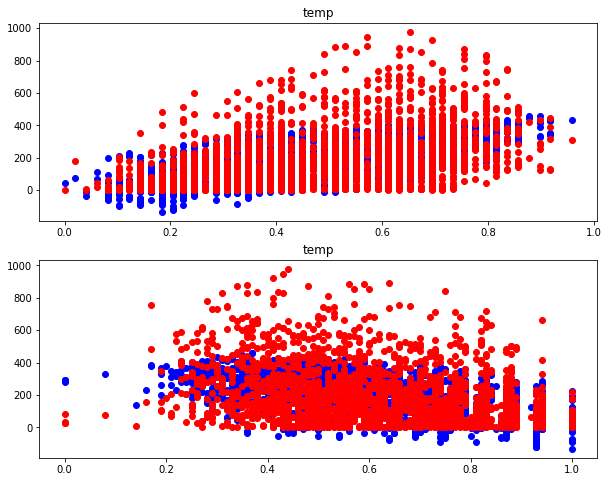

In [122]:
plt.figure(figsize=(10, 8))

ax1 = plt.subplot(2, 1, 1)
ax1.set_title("temp")
ax1.scatter(X_valid[:, 4], y_pred, c="blue")
ax1.scatter(X_valid[:, 4], y_valid, c="red")
           
ax2 = plt.subplot(2, 1, 2)
ax2.set_title("temp")
ax2.scatter(X_valid[:, 6], y_pred, c="blue")
ax2.scatter(X_valid[:, 6], y_valid, c="red")